In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.stats import norm

# Modelisation and experimental context

We want to draw the random statics of multi-colocalization from RNA of N different populations with different abundancies (a1,a2...aN).

Let's try to modelize the spatial distributions of RNAs as an urn drawing problem.

**Context**

Let us consider *V* differently **numbered balls** in the urn. In our experiement a cell has *V* pixels we can resolve to find our RNAs, in other words V different positions. Each time a ball is drawn (e.g a position) it is **replaced** in the urn for the next RNA.

For each RNA we draw *aN* positions. Let's try to sequentially draw each positions.

## First distribution, N = 1

For the first distribution the probability to co-localize with any other distribion will obviously be 0. But we can have a look at the probability of self-colocalization.

At any draw the probability of have a chosen position is 1 out V positions :  *1/V* since positions are replaced in the urn.

Let us call k the iterations of drawing, the number of draws to perform is *a1*.

* At k=1, first drawing :

    The probability of self-colocalization is 0

* At k=2, :

    The probability of picking the position drawn in k=1 is **1/V** (ie self colocalization probality).
Or in other word the probablity of picking a new position is **1-1/V**.

* At k=3 : 

    Things complexify as the probability now depends on the outcome of k=2.
To adress this let us consider the probablity the position we drew was never drawn.
So this specific postion has 1/V chance to be drawn at first draw and then again 1/V, we can view this a binomial trial without any sucess
so this probability is (1/V)².

* At k>2 :

     the probability that at draw k the picked position was never drawn is a binomial trial without any sucess : **(1/V)^k**.


In [3]:
V = 200
a1 = 100
experiment_number = 10000


In [4]:
random_generator = np.random.default_rng()
draws = random_generator.integers(low=1, high=V+1, size=(experiment_number,a1))
draws

array([[118,  71, 185, ...,  91, 162,  11],
       [137,  14,  40, ...,  63, 148,  43],
       [175,  37,   3, ..., 159, 181, 107],
       ...,
       [189,  93,  98, ...,  49, 176,  20],
       [ 12,  52, 184, ...,  69, 182,  77],
       [192,   3, 126, ..., 152,  10, 122]])

In [5]:
colocalisation_count = []
for experiment in draws :
    colocalisation_count.append(len(experiment) - len(np.unique(experiment)))

expected_number_colocalisation :  21.154087298145583


(0.0, 100.0, 0.0, 0.128415)

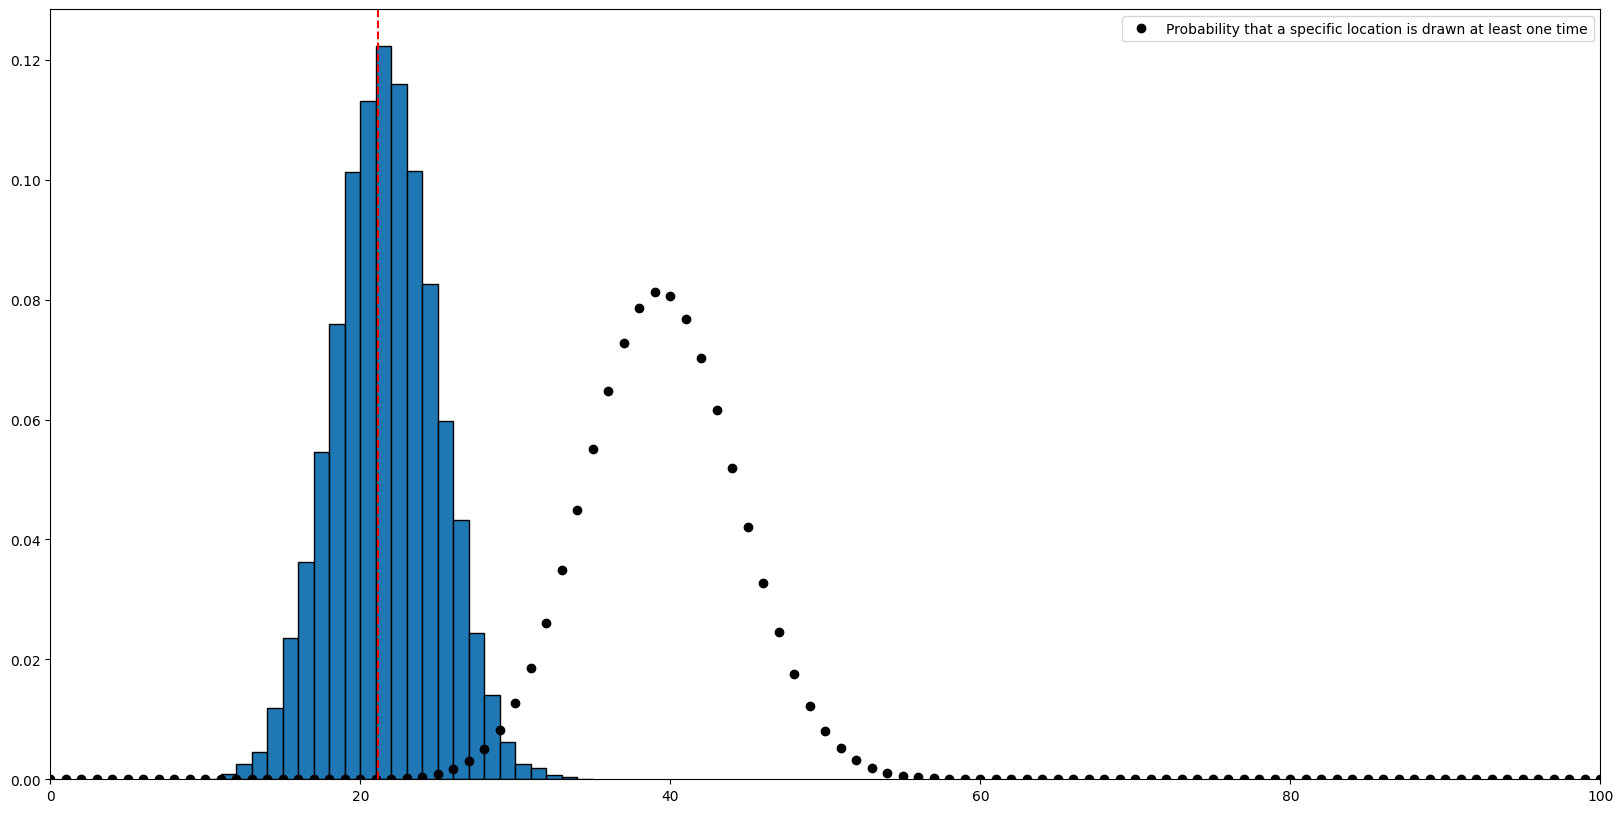

In [6]:
p = 1-(1-1/V)**a1 #

x = np.arange(a1 +1 )
pmf = binom.pmf(x,a1, p)

expceted_number_colocalisation = a1- V*p

print("expected_number_colocalisation : ",expceted_number_colocalisation)

fig = plt.figure(figsize=(20,10))
ax = fig.gca()

ax.hist(colocalisation_count, edgecolor='black', bins=len(np.unique(colocalisation_count)), align='mid', density=True)

ax.set_xlim(0,a1)
ax.plot(x, pmf, 'ok', label= "Probability that a specific location is drawn at least one time")
xmin,xmax,ymin,ymax = plt.axis()
ax.plot([expceted_number_colocalisation,expceted_number_colocalisation],[ymin,ymax], '--r')
ax.legend()

plt.axis([xmin,xmax,ymin,ymax])





## Two distribution, N= 2

In [84]:
V = 200
a1 = 100
a2 = 150
experiment_number = 1000000

Expected_number_different_a1_positions = V*(1-(1-(1/V))**a1)
Expected_number_different_a1_positions

78.84591270185442

In [103]:
random_generator = np.random.default_rng()
a_1_draws = random_generator.integers(low=1, high=V+1, size=(experiment_number,a1))
draws = random_generator.integers(low=1, high=V+1, size=(experiment_number,a2))
draws

array([[155,  92,  73, ...,  37,  32,  60],
       [112, 139, 176, ..., 116,  88, 197],
       [120, 166,  59, ..., 165,  42,  18],
       ...,
       [ 11, 103,  99, ..., 165,  13,  78],
       [ 45, 120,  87, ..., 103,  91,   4],
       [173, 188,  82, ..., 114,  95, 102]])

In [110]:
colocalisation_count = []
different_pairs = []
for experiment, a_1_sample in zip(draws, a_1_draws) :
    
    colocalisation_count.append(len(
        experiment[np.isin(experiment, a_1_sample)]
    ))

    # different_pairs.append(len(
    #     np.unique(experiment[np.isin(experiment, a_1_sample)])
    # ))

In [ ]:
truth_table  = (draws[:,:,None] == a_1_draws[:,None,:]).any(axis=2)
colocalisation_count_test = truth_table.sum(axis=1)


In [ ]:
all(colocalisation_count_test == colocalisation_count)

True

In [87]:
def compute_colocalization_count_expectancy(a1_unique, a2, V) :
    """
    Compute the expected number of colocalization events which corresponds to a binomial law of sucess probability of a2 picking a position occupied by the a1_unique particules amongst the V postions.
    Expectancy = np
    
    """
    
    if V == 0 : return np.NaN #No positions available.
    
    coloc_count = a2 * a1_unique/V
    
    return coloc_count

In [88]:
def compute_colocalization_count_std(a1_unique, a2, V) :
    """
    Compute standard deviation of expected number of colocalization events which corresponds to a binomial law of sucess probability of a2 picking a position occupied by the a1_unique particules amongst the V postions.
    Std = np(1-p)
    """
    
    if V == 0 : return np.NaN #No positions available.
    
    std = a2 * a1_unique/V * (1-a1_unique/V)
    
    return std

In [89]:
def compute_unique_pair_expectancy(a1_unique, a2, V) :
    """
    Compute expected number of unique pair formed between a2 singles and a1_unique singles when the number of positions available is V.
    """
    if V == 0 : return np.NaN
    
    unique_pair_count = a1_unique*(1-(1-1/V)**a2)
    
    return unique_pair_count

In [90]:
from math import comb

def compute_unique_pair_std(a1_unique, a2, V) :
    """
    Compute expected standard deviation of number of unique pair formed between a2 singles and a1_unique singles when the number of positions available is V.
    
    We use the formula of variance for a sum of random variables Ii.
    var = iSum(Var(I)) + 2*iSum(Cov(I))
    
    First term is called Exp
    second Cov
    
    Exp = Sum(p*(1-p)) (Bernoulli law)
     --> a1_unique *(p(1-p))
    
    Cov = E(Ii and Ij) - E(Ii)*E(Ij) (called Eij, Ei and Ej)
    
    """
    if V == 0 : return np.NaN
    
    p = 1 - (1-1/V)**a2 # probability to draw a specific location at least once
    Exp = a1_unique*p*(1-p) # Variance of bernouli law
    Cov = (1-2/V)**a2 - (1-1/V)**(2*a2) #Simplified expression for cov
    
    var = Exp + 2*comb(round(a1_unique),2)*Cov
    
    return np.sqrt(var)

expected_number_colocalisation :  21.154087298145583
expected_number_of_unique_pairs :  41.67174133032364


(0.0, 150.0, 0.0, 0.10952771339962995)

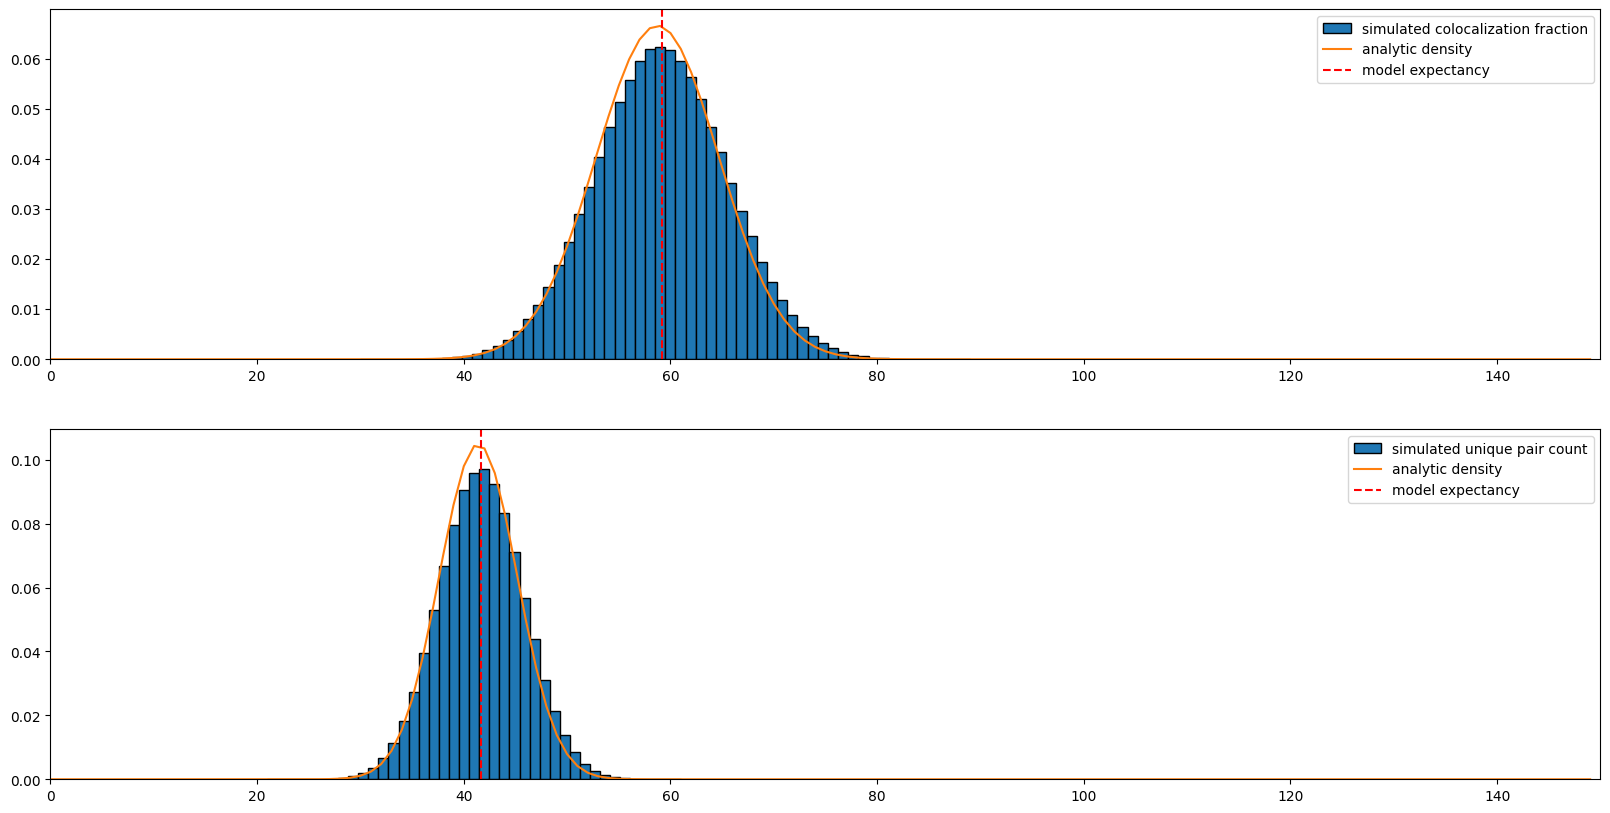

In [91]:
# p = 1-(1-1/V)**a1 #

# x = np.arange(a1 +1 )
# pmf = binom.pmf(x,a1, p)


print("expected_number_colocalisation : ",expceted_number_colocalisation)

fig = plt.figure(figsize=(20,10))
top,bot = fig.subplots(2,1)

#Co-localisation fraction
expected_colocalization_fraction = (a2*Expected_number_different_a1_positions)/V
std = np.sqrt(expected_colocalization_fraction* (1-Expected_number_different_a1_positions/V))

count,bins,_ =top.hist(colocalisation_count, edgecolor='black', bins=len(np.unique(colocalisation_count)), align='mid', density=True, label='simulated colocalization fraction')

top.plot(norm.pdf(np.linspace(0,a2,a2), expected_colocalization_fraction, std), label= 'analytic density')

xmin,xmax,ymin,ymax = top.axis()
top.plot([expected_colocalization_fraction,expected_colocalization_fraction],[ymin,ymax], '--r', label= 'model expectancy')
top.legend()
top.axis([0,a2,ymin,ymax])


#Cluster number forming pairs
expected_number_of_unique_pairs = Expected_number_different_a1_positions*(1-(1-1/V)**a2)
std = compute_unique_pair_std(Expected_number_different_a1_positions, a2, V)
print("expected_number_of_unique_pairs : ",expected_number_of_unique_pairs)

bot.hist(different_pairs, edgecolor='black', bins=len(np.unique(different_pairs)), align='mid', density=True, label='simulated unique pair count')
bot.plot(norm.pdf(np.linspace(0,a2,a2), expected_number_of_unique_pairs, std), label= 'analytic density')
xmin,xmax,ymin,ymax = bot.axis()
bot.plot([expected_number_of_unique_pairs,expected_number_of_unique_pairs],[ymin,ymax], '--r', label= 'model expectancy')
bot.legend()
bot.axis([0,a2,ymin,ymax])
